# Keywords
- Use extracted keywords from S-1 raw filings
- Word2Vect visualization method by Jeff Delaney: Visualizing Word Vectors with t-SNE
 - https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [1]:
#core
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import numpy as np
from sklearn import neighbors

import glob
import nasdaq
import ml
from pathlib import Path
from sklearn.manifold import TSNE

#NLP
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from gensim.summarization import keywords
from gensim.models import Word2Vec

C:\Users\Void\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Integrating IPO Keywords

In [2]:
#load previous dataset
df = pd.read_csv('../Datasets/3 summarization.csv', index_col='Symbol')

In [3]:
#tokenize words
counter = 0    
documents = []

for x in df.index:
    try:
        counter += 1
        print('\n( ' + str(counter) + ' / ' + str(df.shape[0]) + ' ) ' + x)

        #check if keywords are available
        file_name = "../Keywords/" + x + ".txt"
        if Path(file_name).is_file():
            #load data
            with open(file_name, "r", encoding="utf-8") as file:
                text = file.read()
                documents.append(word_tokenize(text))
        else:
            print('no S-1 keywords for ', x)
    except Exception as e:
        print(x, e)


( 1 / 696 ) AACC

( 2 / 696 ) AAT

( 3 / 696 ) ABR

( 4 / 696 ) ABTX

( 5 / 696 ) ACAD

( 6 / 696 ) ACFC

( 7 / 696 ) ACIA

( 8 / 696 ) ACMR

( 9 / 696 ) ACOR

( 10 / 696 ) ACRX

( 11 / 696 ) ACUS

( 12 / 696 ) ADMS

( 13 / 696 ) ADOM

( 14 / 696 ) ADRO

( 15 / 696 ) ADSW

( 16 / 696 ) ADT

( 17 / 696 ) ADUS

( 18 / 696 ) AEL

( 19 / 696 ) AERI

( 20 / 696 ) AFFY

( 21 / 696 ) AFH

( 22 / 696 ) AIMC

( 23 / 696 ) AIMT

( 24 / 696 ) AIZ

( 25 / 696 ) AJX

( 26 / 696 ) AKAO

( 27 / 696 ) AKBA

( 28 / 696 ) AKER

( 29 / 696 ) AL

( 30 / 696 ) ALDR

( 31 / 696 ) ALDX

( 32 / 696 ) ALGT

( 33 / 696 ) ALRM

( 34 / 696 ) ALRN

( 35 / 696 ) ALSN

( 36 / 696 ) AM

( 37 / 696 ) AMBA

( 38 / 696 ) AMGP

( 39 / 696 ) ANAB

( 40 / 696 ) ANET

( 41 / 696 ) ANGI

( 42 / 696 ) ANTH

( 43 / 696 ) APAM

( 44 / 696 ) APEI

( 45 / 696 ) APKT

( 46 / 696 ) APO

( 47 / 696 ) APPF

( 48 / 696 ) APPN

( 49 / 696 ) APRN

( 50 / 696 ) ARMK

( 51 / 696 ) ARMO

( 52 / 696 ) ARYX

( 53 / 696 ) ASV

( 54 / 696 ) A


( 431 / 696 ) OAK

( 432 / 696 ) OAS

( 433 / 696 ) OBLN

( 434 / 696 ) OC

( 435 / 696 ) OCUL

( 436 / 696 ) OFSI

( 437 / 696 ) OIS

( 438 / 696 ) OKTA

( 439 / 696 ) OLLI

( 440 / 696 ) OMED

( 441 / 696 ) OMER

( 442 / 696 ) OMPI

( 443 / 696 ) ONCE

( 444 / 696 ) ONDK

( 445 / 696 ) ONTX

( 446 / 696 ) OPESU

( 447 / 696 ) OPGN

( 448 / 696 ) OPHT

( 449 / 696 ) OPTN

( 450 / 696 ) OPTR

( 451 / 696 ) OPTT

( 452 / 696 ) ORC

( 453 / 696 ) ORIT

( 454 / 696 ) OSTK

( 455 / 696 ) OTIC

( 456 / 696 ) OTT

( 457 / 696 ) OUNZ

( 458 / 696 ) OVID

( 459 / 696 ) OXFD

( 460 / 696 ) OZM

( 461 / 696 ) P

( 462 / 696 ) PACB

( 463 / 696 ) PAGP

( 464 / 696 ) PAHC

( 465 / 696 ) PANW

( 466 / 696 ) PAY

( 467 / 696 ) PAYC

( 468 / 696 ) PBF

( 469 / 696 ) PBFX

( 470 / 696 ) PBIB

( 471 / 696 ) PBIP

( 472 / 696 ) PBPB

( 473 / 696 ) PCRX

( 474 / 696 ) PCTY

( 475 / 696 ) PDM

( 476 / 696 ) PE

( 477 / 696 ) PEB

( 478 / 696 ) PEGI

( 479 / 696 ) PER

( 480 / 696 ) PETX

( 481 / 696 ) PF

# Word2Vect

In [4]:
# build vocabulary and train model
model1 = Word2Vec(documents, size=len(documents))
model2 = Word2Vec(documents, size=len(documents), hs=1, negative=0)

In [5]:
# Code by Jeff Delaney: Visualizing Word Vectors with t-SNE
# https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
matplotlib.rcParams.update({'font.size': 10})

tsne_plot(model1)

# Integrate Word Embeddings

In [6]:
#add sentiment features
df_keywords_features = pd.DataFrame()
counter = 0    

for x in df.index:
    try:
        counter += 1
        print('\n( ' + str(counter) + ' / ' + str(df.shape[0]) + ' ) ' + x)

        #check if keywords are available
        file_name = "../Keywords/" + x + ".txt"
        if Path(file_name).is_file():
            #load data
            with open(file_name, "r", encoding="utf-8") as file:
                text = file.read()
                words = word_tokenize(text)
                    
                #keywords features
                df_keywords_features.at[x, 'Keywords Count'] = len(words)
                
                for w in words:
                    dist = []
                    scores = []
                    
                    if w in model1.wv.vocab:
                        for _, j in model1.wv.most_similar(w):
                            dist.append(j)
                    
                    if w in model2.wv.vocab:
                        scores.append(model2.score(w))
                    
                    df_keywords_features.at[x, 'Keywords Similarity Top'] = dist[0]
                    df_keywords_features.at[x, 'Keywords Similarity Sum'] = np.sum(dist)
                    #df_keywords_features.at[x, 'Keywords Similarity Word Score Sum'] = np.sum(scores)
                    #df_keywords_features.at[x, 'Keywords Similarity Word Score Mean'] = np.mean(scores)
                    
                #df_keywords_features.at[x, 'Keywords Similarity Words Score'] = model2.score(words)[0]
        else:
            print('no S-1 keywords for ', x)
    except Exception as e:
        print(x, e)


( 1 / 696 ) AACC
AACC list index out of range

( 2 / 696 ) AAT
AAT list index out of range

( 3 / 696 ) ABR
ABR list index out of range

( 4 / 696 ) ABTX
ABTX list index out of range

( 5 / 696 ) ACAD

( 6 / 696 ) ACFC
ACFC list index out of range

( 7 / 696 ) ACIA

( 8 / 696 ) ACMR
ACMR list index out of range

( 9 / 696 ) ACOR
ACOR list index out of range

( 10 / 696 ) ACRX
ACRX list index out of range

( 11 / 696 ) ACUS
ACUS list index out of range

( 12 / 696 ) ADMS

( 13 / 696 ) ADOM
ADOM list index out of range

( 14 / 696 ) ADRO

( 15 / 696 ) ADSW
ADSW list index out of range

( 16 / 696 ) ADT
ADT list index out of range

( 17 / 696 ) ADUS
ADUS list index out of range

( 18 / 696 ) AEL
AEL list index out of range

( 19 / 696 ) AERI

( 20 / 696 ) AFFY
AFFY list index out of range

( 21 / 696 ) AFH
AFH list index out of range

( 22 / 696 ) AIMC

( 23 / 696 ) AIMT

( 24 / 696 ) AIZ
AIZ list index out of range

( 25 / 696 ) AJX

( 26 / 696 ) AKAO
AKAO list index out of range

( 27 

ESQ list index out of range

( 219 / 696 ) ESRT

( 220 / 696 ) ETE
ETE list index out of range

( 221 / 696 ) EVA
EVA list index out of range

( 222 / 696 ) EVBG
EVBG list index out of range

( 223 / 696 ) EVC
EVC list index out of range

( 224 / 696 ) EVEP
EVEP list index out of range

( 225 / 696 ) EVHC
EVHC list index out of range

( 226 / 696 ) EVTC
EVTC list index out of range

( 227 / 696 ) EYE
EYE list index out of range

( 228 / 696 ) EYEN
EYEN list index out of range

( 229 / 696 ) FBM
FBM list index out of range

( 230 / 696 ) FCB
FCB list index out of range

( 231 / 696 ) FELP
FELP list index out of range

( 232 / 696 ) FET
FET list index out of range

( 233 / 696 ) FEYE
FEYE list index out of range

( 234 / 696 ) FGEN
FGEN list index out of range

( 235 / 696 ) FMI
FMI list index out of range

( 236 / 696 ) FMSA
FMSA list index out of range

( 237 / 696 ) FN

( 238 / 696 ) FND
FND list index out of range

( 239 / 696 ) FNGN
FNGN list index out of range

( 240 / 696 ) FOLD
F


( 420 / 696 ) NINE
NINE list index out of range

( 421 / 696 ) NMRK
NMRK list index out of range

( 422 / 696 ) NOVN
NOVN list index out of range

( 423 / 696 ) NOW

( 424 / 696 ) NSM
NSM list index out of range

( 425 / 696 ) NSTG

( 426 / 696 ) NTGR
NTGR list index out of range

( 427 / 696 ) NWHM
NWHM list index out of range

( 428 / 696 ) NWY
NWY list index out of range

( 429 / 696 ) NXTM
NXTM list index out of range

( 430 / 696 ) NYLD
NYLD list index out of range

( 431 / 696 ) OAK
OAK list index out of range

( 432 / 696 ) OAS

( 433 / 696 ) OBLN
OBLN list index out of range

( 434 / 696 ) OC
OC list index out of range

( 435 / 696 ) OCUL
OCUL list index out of range

( 436 / 696 ) OFSI

( 437 / 696 ) OIS

( 438 / 696 ) OKTA

( 439 / 696 ) OLLI

( 440 / 696 ) OMED
OMED list index out of range

( 441 / 696 ) OMER
OMER list index out of range

( 442 / 696 ) OMPI
OMPI list index out of range

( 443 / 696 ) ONCE
ONCE list index out of range

( 444 / 696 ) ONDK

( 445 / 696 ) ONTX



( 627 / 696 ) TRMT

( 628 / 696 ) TTOO

( 629 / 696 ) TTPH
TTPH list index out of range

( 630 / 696 ) TUSK
TUSK list index out of range

( 631 / 696 ) TVPT
TVPT list index out of range

( 632 / 696 ) TWOU
TWOU list index out of range

( 633 / 696 ) TWTR
TWTR list index out of range

( 634 / 696 ) TXRH
TXRH list index out of range

( 635 / 696 ) TYHT
TYHT list index out of range

( 636 / 696 ) UNG
UNG list index out of range

( 637 / 696 ) UPLD

( 638 / 696 ) USAC
USAC list index out of range

( 639 / 696 ) USCI
USCI list index out of range

( 640 / 696 ) USFD

( 641 / 696 ) VCRA
VCRA list index out of range

( 642 / 696 ) VCTR

( 643 / 696 ) VCYT
VCYT list index out of range

( 644 / 696 ) VEEV

( 645 / 696 ) VERI
VERI list index out of range

( 646 / 696 ) VIRT
VIRT list index out of range

( 647 / 696 ) VLP
VLP list index out of range

( 648 / 696 ) VLTR
VLTR list index out of range

( 649 / 696 ) VNCE
VNCE list index out of range

( 650 / 696 ) VNDA
VNDA list index out of range

(

In [7]:
df = pd.concat([ml.standardize(df_keywords_features), df], axis=1).dropna()

# Clustering

In [8]:
#save targets
targets = df[df.columns[-4:]]
df1 = df[df.columns[:-4]]

In [9]:
def add_nearest_neigbors(df):
    sample = df.copy()
    nbrs = neighbors.NearestNeighbors(n_neighbors=3).fit(sample)
    distances, indices = nbrs.kneighbors(df, n_neighbors=1)
    similar = df.iloc[indices[:, 0]]
    cols = ['KNN ' + x for x in list(df.columns)] + list(df.columns)
    
    return pd.DataFrame(np.concatenate([similar.values, df.values], axis=1), columns=cols, index=df.index)

In [10]:
#add cluster features (1-NN)
df1 = add_nearest_neigbors(df1)
df1 = pd.concat([df1, targets], axis=1)

In [11]:
#save for later improvements
df1.to_csv('../Datasets/4 keywords.csv', index=True, index_label='Symbol')

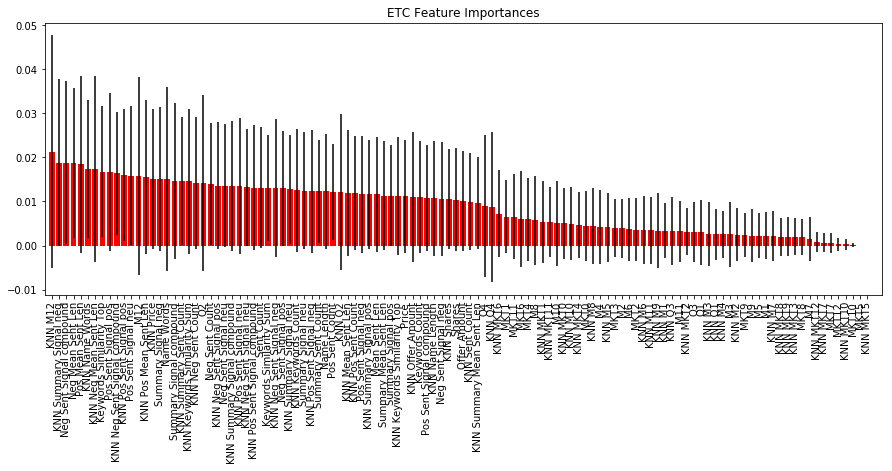

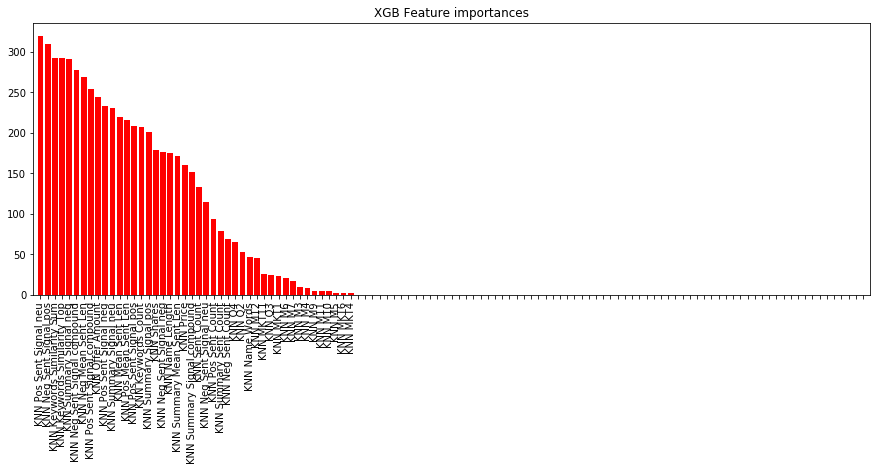

In [12]:
#feature importance
indices = ml.show_feature_importance(df1, '3M')

In [13]:
#feature selection
df1 = ml.select_features(indices.shape[0], indices, df1)

['KNN Keywords Similarity Top', 'KNN Keywords Similarity Sum', 'KNN Summary Signal neg', 'KNN Neg Sent Signal pos', 'KNN Pos Sent Signal neu', 'KNN M12', 'Neg Sent Signal compound', 'Pos Mean Sent Len', 'Neg Mean Sent Len']


C:\Users\Void\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


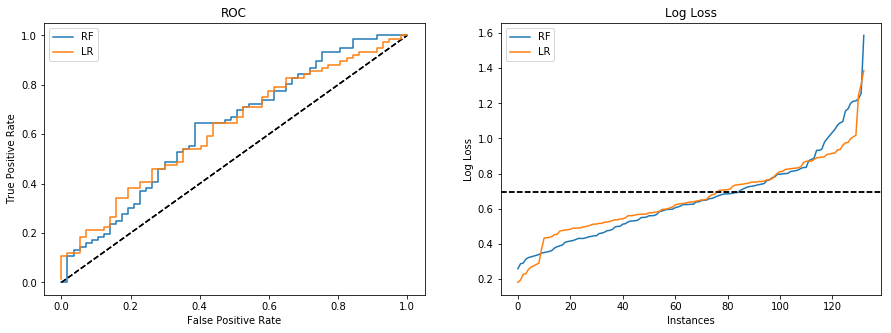

1D        1W        1M        3M
AUC      LR  0.510965  0.510965  0.510965  0.510965
         RF  0.589912  0.589912  0.589912  0.589912
f1       LR  0.713568  0.713568  0.713568  0.713568
         RF  0.747368  0.747368  0.747368  0.747368
log loss LR   0.65972   0.65972   0.65972   0.65972
         RF  0.656672  0.656672  0.656672  0.656672

In [14]:
#now run ML flow with cluster features
ml.run_ml_flow(df1)